<a href="https://www.kaggle.com/code/klyushnik/ensemble-learning-regression?scriptVersionId=168508493" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crab-age-prediction/CrabAgePrediction.csv
/kaggle/input/crab-age-fine-tuned-gpt2/config.json
/kaggle/input/crab-age-fine-tuned-gpt2/model.pt
/kaggle/input/playground-series-s3e16/sample_submission.csv
/kaggle/input/playground-series-s3e16/train.csv
/kaggle/input/playground-series-s3e16/test.csv


# Load data

In [2]:
train = pd.read_csv('/kaggle/input/playground-series-s3e16/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s3e16/test.csv')
original = pd.read_csv('/kaggle/input/crab-age-prediction/CrabAgePrediction.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              74051 non-null  int64  
 1   Sex             74051 non-null  object 
 2   Length          74051 non-null  float64
 3   Diameter        74051 non-null  float64
 4   Height          74051 non-null  float64
 5   Weight          74051 non-null  float64
 6   Shucked Weight  74051 non-null  float64
 7   Viscera Weight  74051 non-null  float64
 8   Shell Weight    74051 non-null  float64
 9   Age             74051 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 5.6+ MB


In [4]:
train.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [5]:
train = train.drop(columns=["id"])
test = test.drop(columns=["id"])

In [6]:
train =  pd.concat([train, original])
train.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


# Visual set

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image
%matplotlib inline

In [8]:
!pip install AutoViz
!pip install xlrd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.3/68.3 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 60.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 9.8 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 1.7.5
    Uninstalling xgboost-1.7.5:
      Successfully uninstalled xgboost-1.7.5
  Attempting uninstall: holoviews
    Found existing installation: holoviews 1.16.0
    Uninstalling holoviews-1.16.0:
      Successfully uninstalled holoviews-1.16.0


In [9]:
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()

Imported v0.1.806. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image
%matplotlib inline

Shape of your Data Set loaded: (74051, 10)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    10 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
    All variables classified into correct types.


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
id,int64,0.000000,100,0.000000,74050.000000,Possible ID column: drop before modeling step.
Sex,object,0.000000,0,,,No issue
Length,float64,0.000000,NA,0.187500,2.012815,Column has 1270 outliers greater than upper bound (2.12) or lower than lower bound(0.57). Cap them or remove them.
Diameter,float64,0.000000,NA,0.137500,1.612500,"Column has 1278 outliers greater than upper bound (1.67) or lower than lower bound(0.42). Cap them or remove them., Column has a high correlation with ['Length']. Consider dropping one of them."
Height,float64,0.000000,NA,0.000000,2.825000,"Column has 1250 outliers greater than upper bound (0.58) or lower than lower bound(0.13). Cap them or remove them., Column has a high correlation with ['Length', 'Diameter']. Consider dropping one of them."
Weight,float64,0.000000,NA,0.056699,80.101512,"Column has 249 outliers greater than upper bound (60.25) or lower than lower bound(-14.65). Cap them or remove them., Column has a high correlation with ['Length', 'Diameter', 'Height']. Consider dropping one of them."
Shucked Weight,float64,0.000000,NA,0.028349,42.184056,"Column has 311 outliers greater than upper bound (26.51) or lower than lower bound(-6.77). Cap them or remove them., Column has a high correlation with ['Length', 'Diameter', 'Height', 'Weight']. Consider dropping one of them."
Viscera Weight,float64,0.000000,NA,0.042524,21.545620,"Column has 283 outliers greater than upper bound (13.18) or lower than lower bound(-3.32). Cap them or remove them., Column has a high correlation with ['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight']. Consider dropping one of them."
Shell Weight,float64,0.000000,NA,0.042524,28.491248,"Column has 397 outliers greater than upper bound (16.73) or lower than lower bound(-3.69). Cap them or remove them., Column has a high correlation with ['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight']. Consider dropping one of them."
Age,int64,0.000000,0,1.000000,29.000000,Column has 4811 outliers greater than upper bound (15.50) or lower than lower bound(3.50). Cap them or remove them.


Number of All Scatter Plots = 28


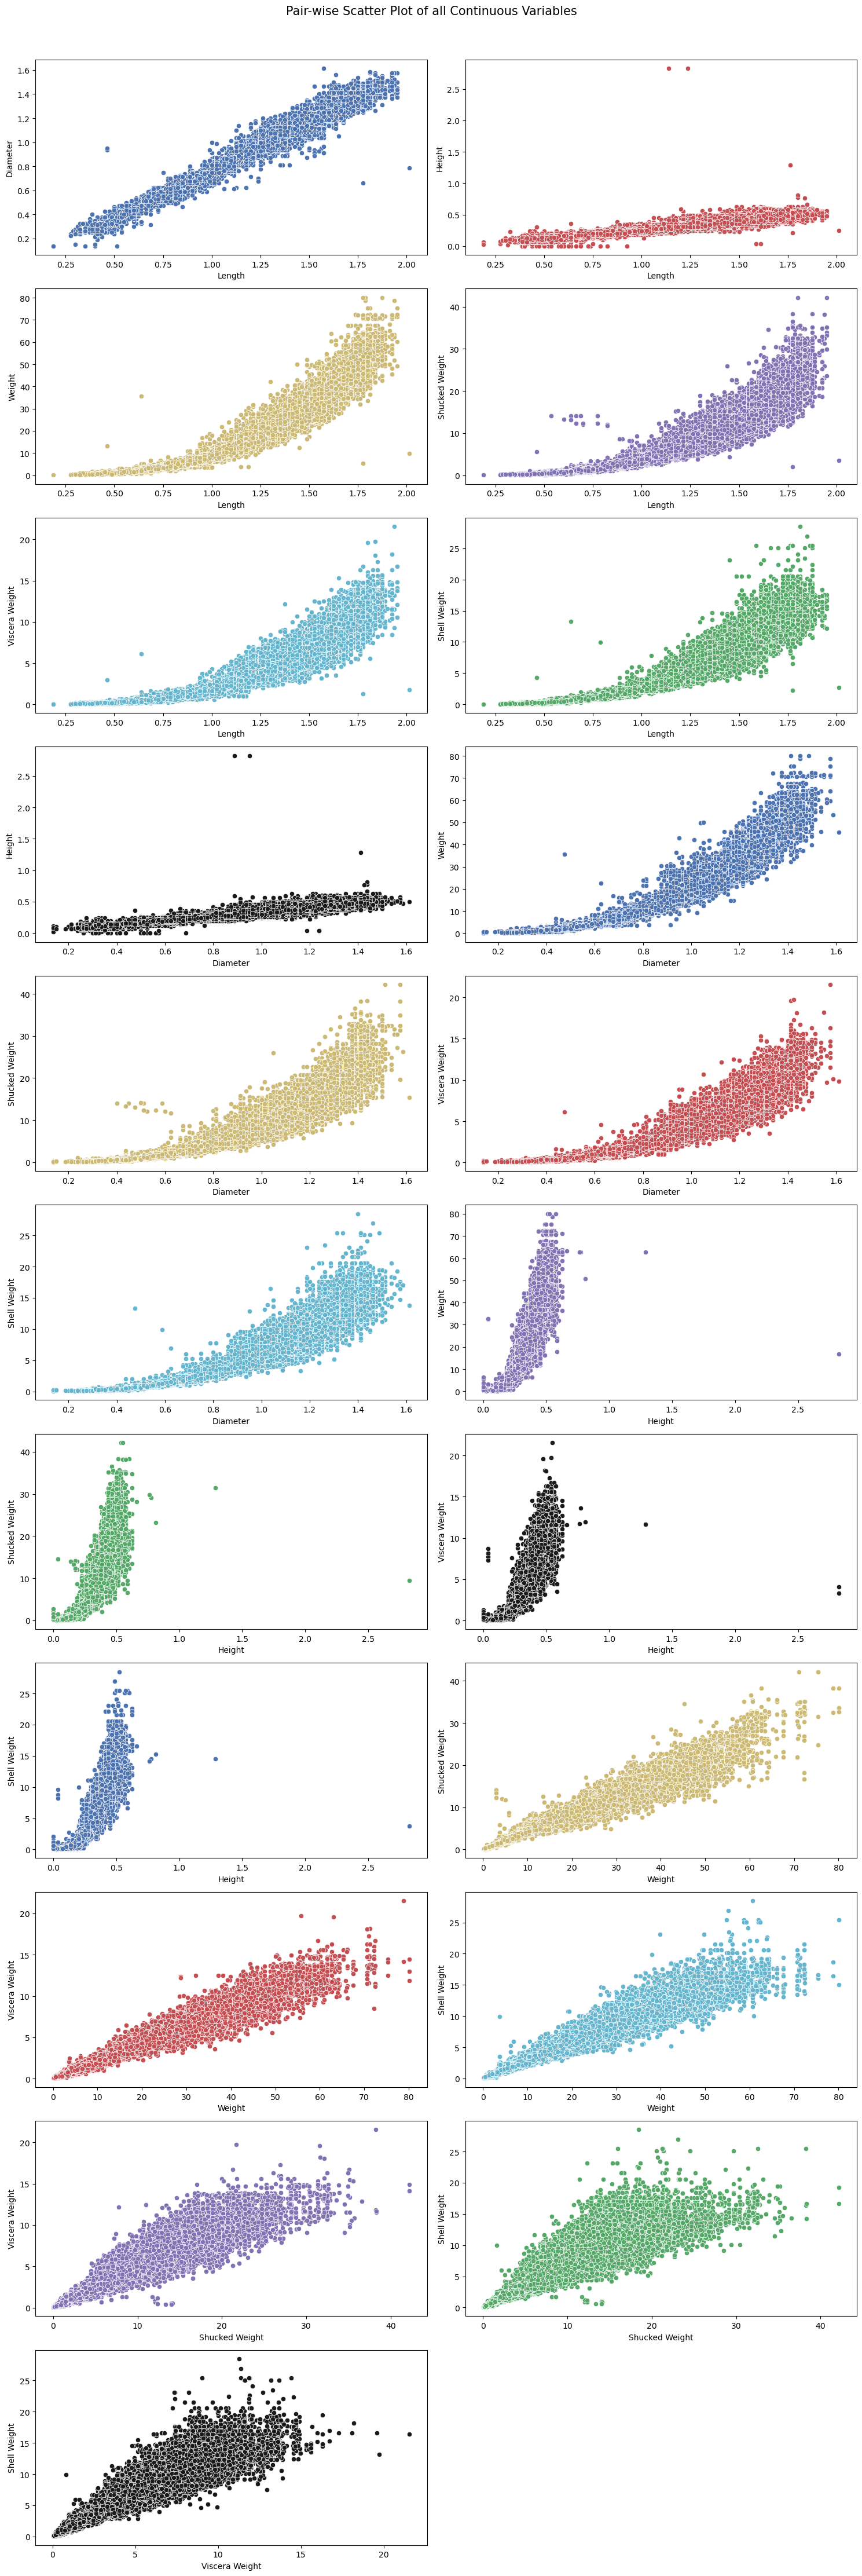

Could not draw Distribution Plot


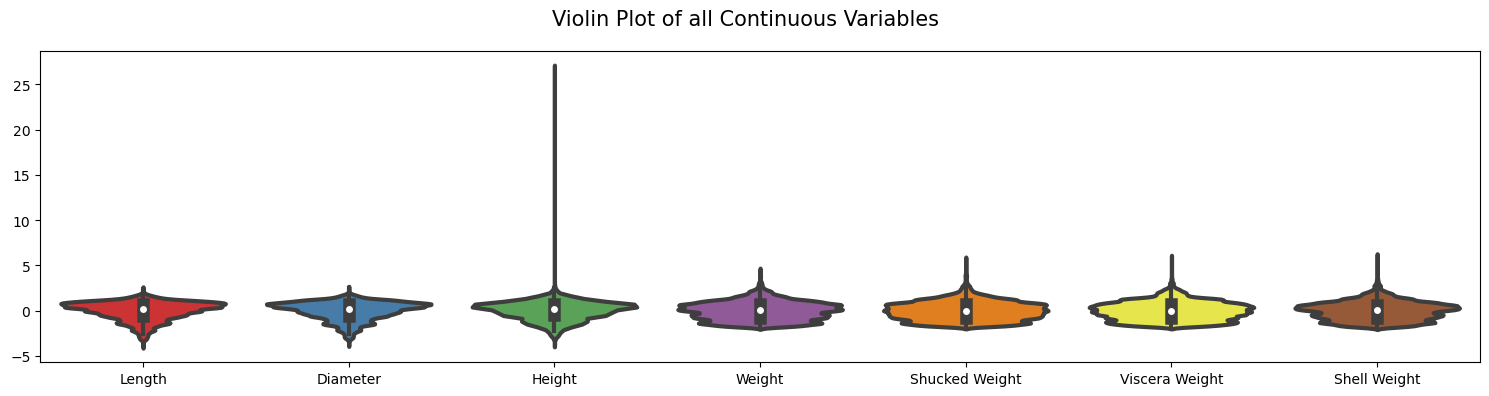

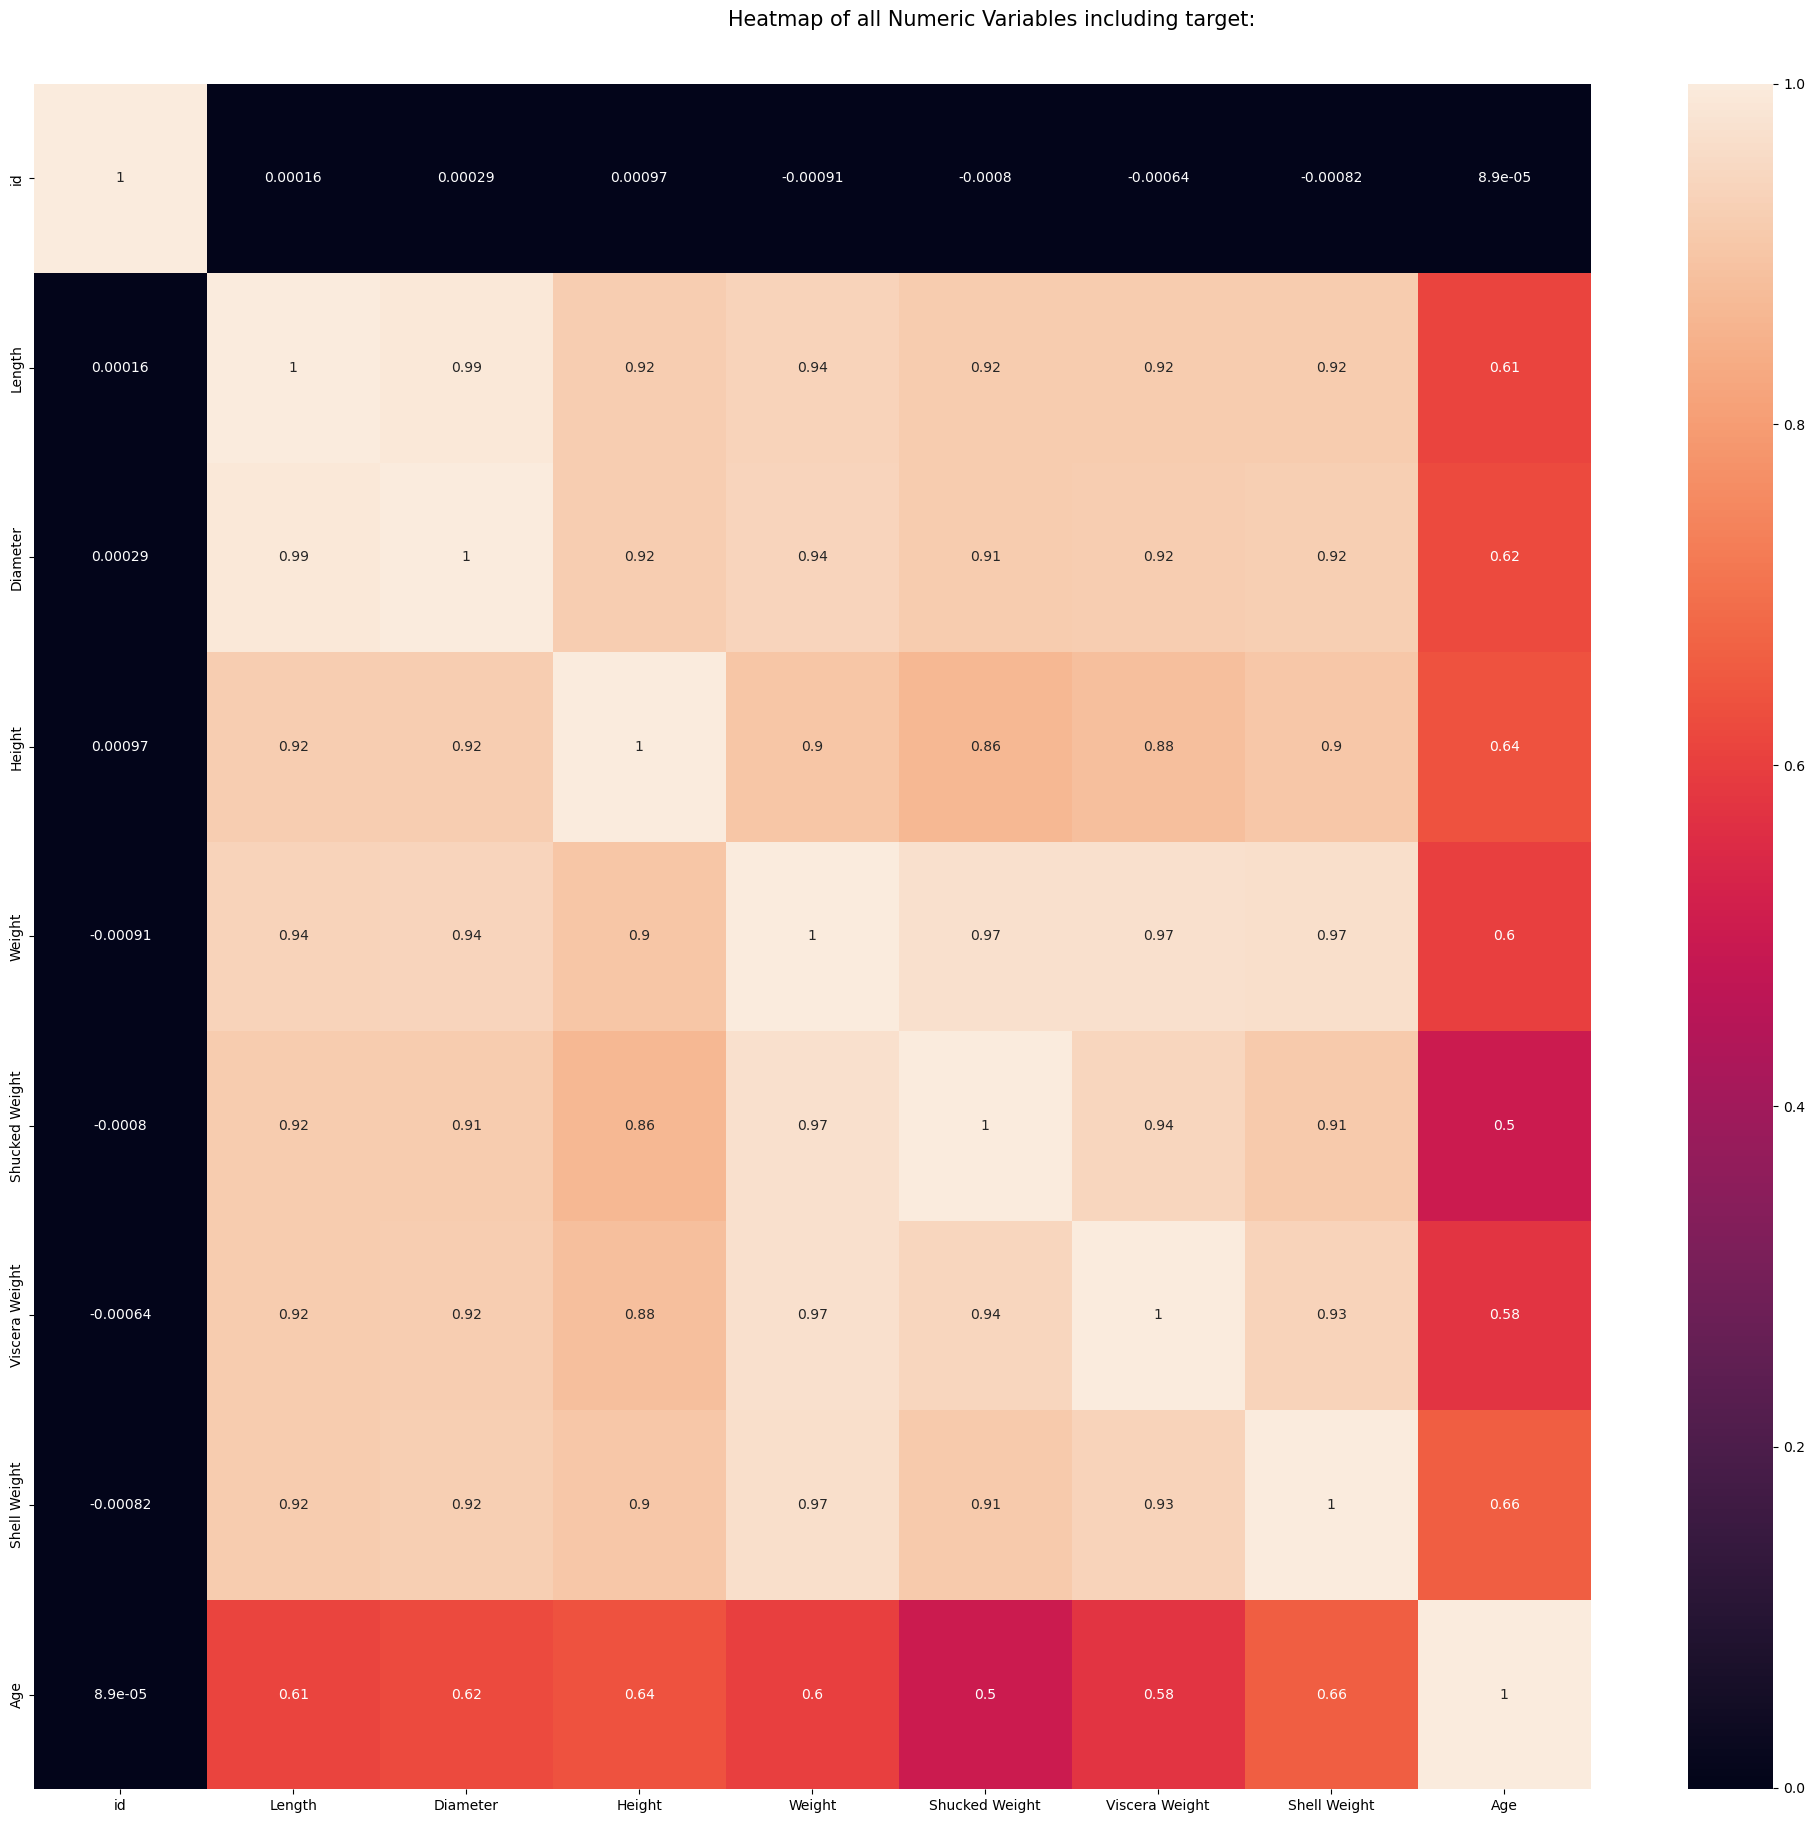

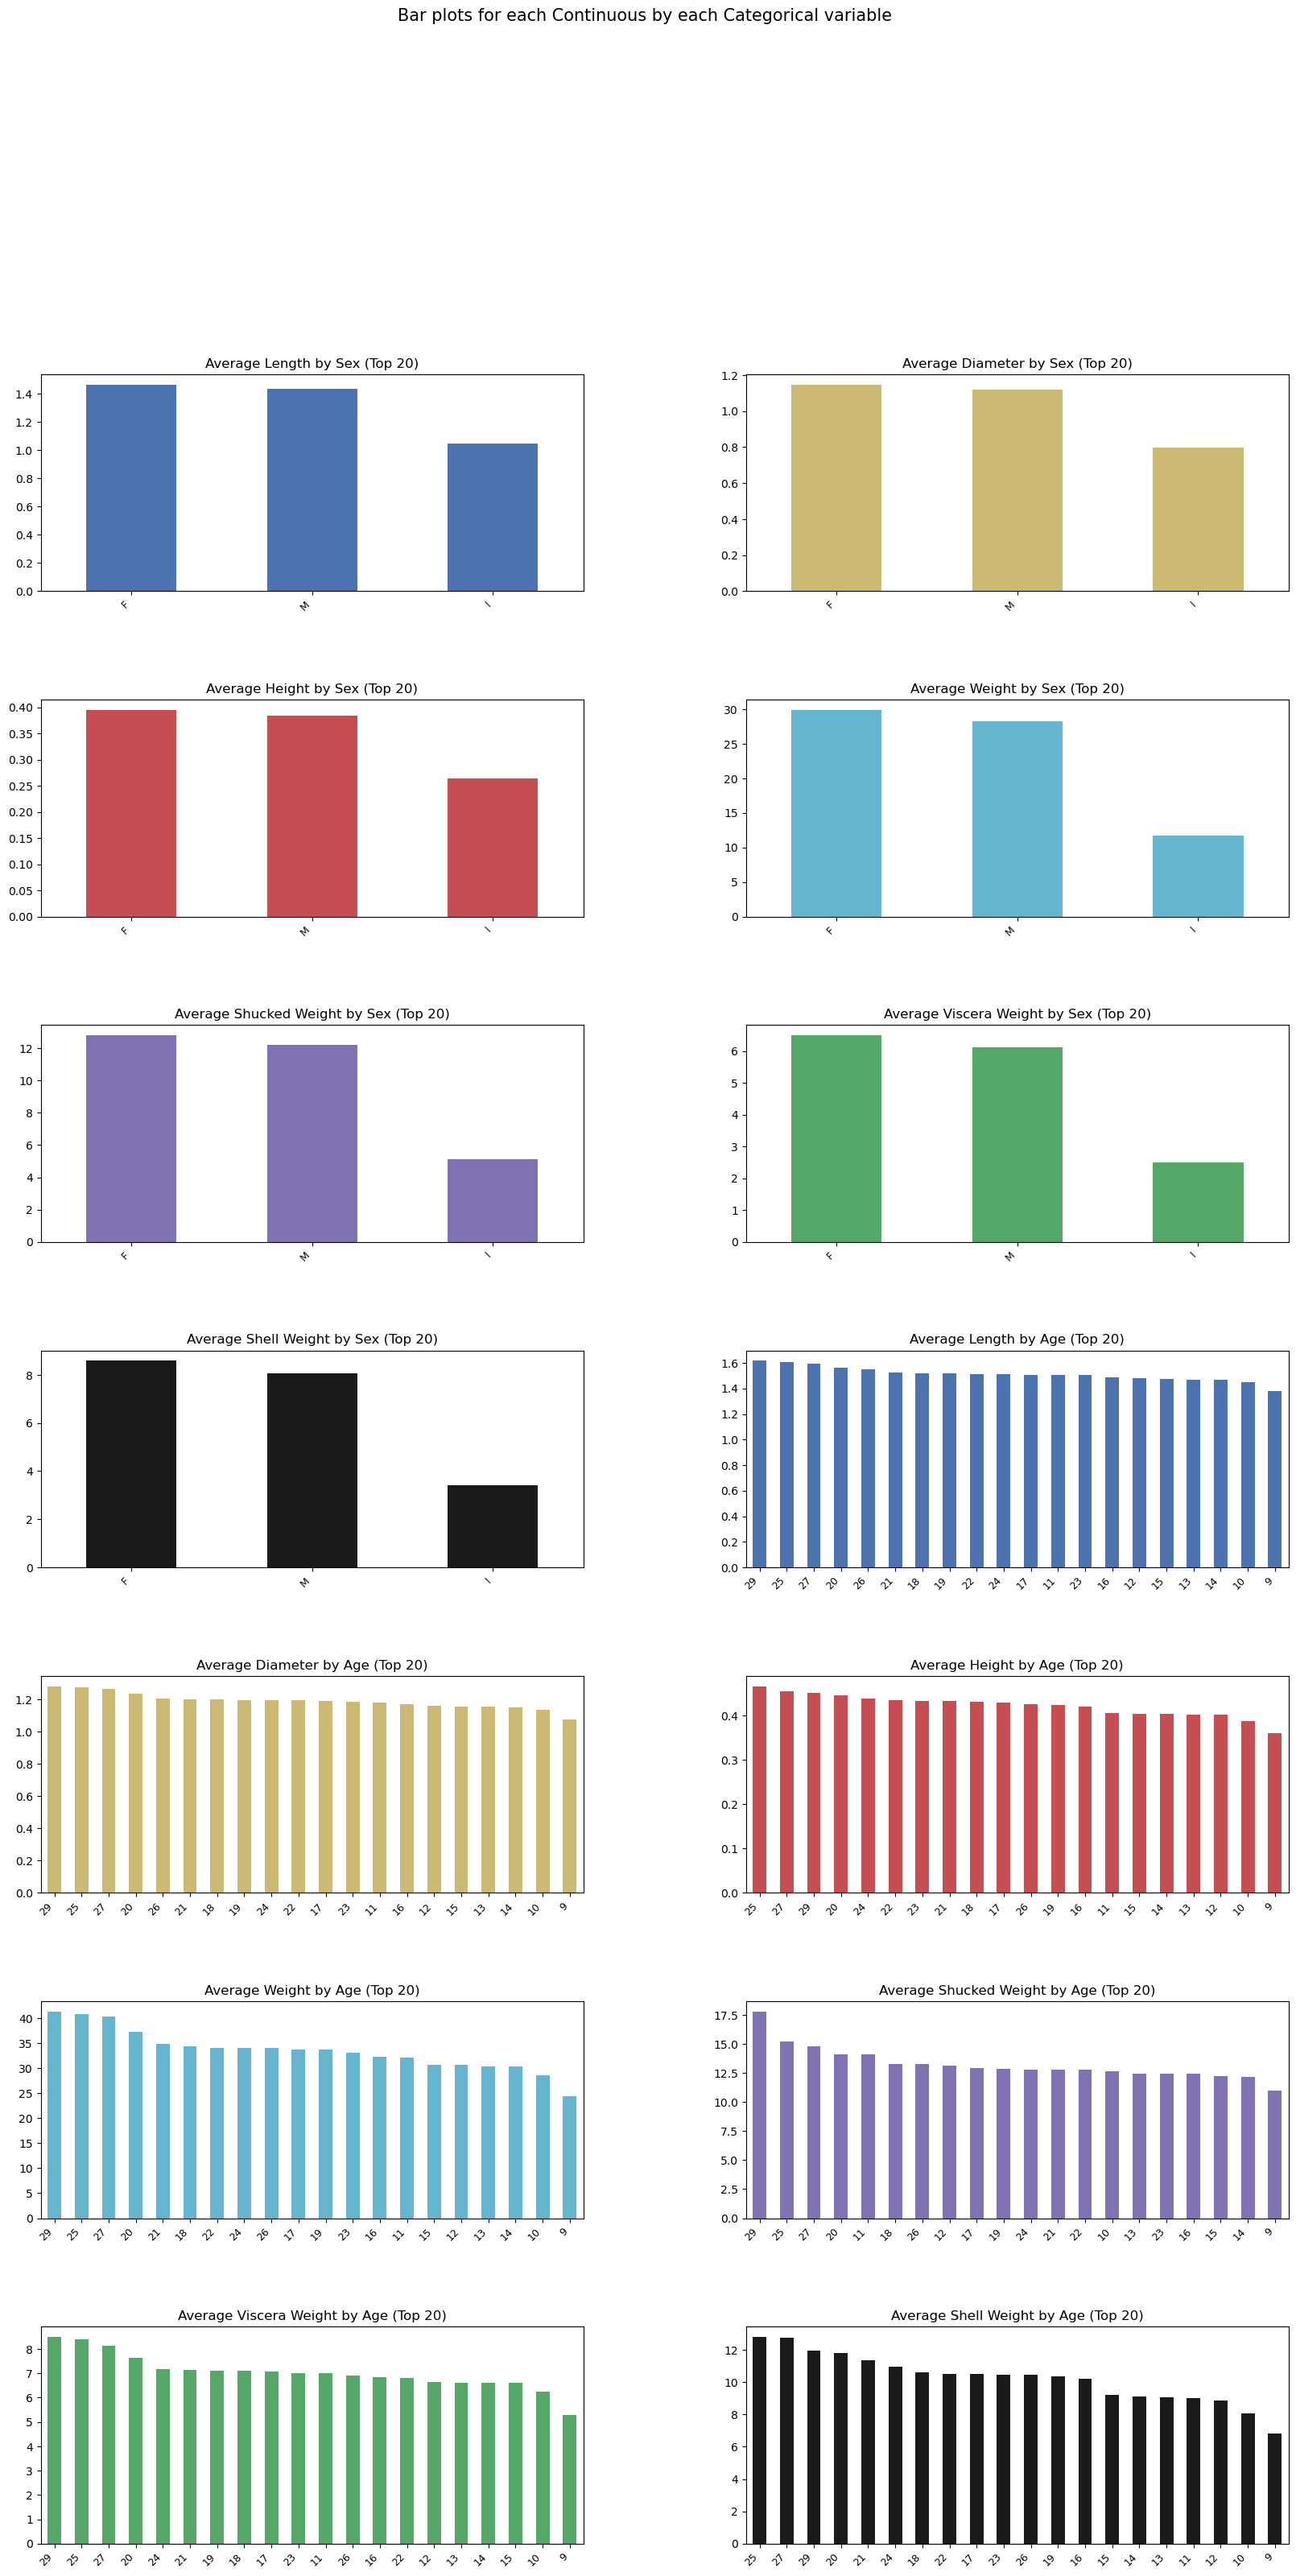

All Plots done
Time to run AutoViz = 15 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [11]:
filename = "/kaggle/input/playground-series-s3e16/train.csv"
sep = ","
dft = AV.AutoViz(
    filename,
    sep=",",
    depVar="",
    dfte=None,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
)

# Get dummies

In [12]:
encoded_columns = pd.get_dummies(train['Sex'])
train_df = pd.concat([train, encoded_columns], axis=1)
encoded_columns_test = pd.get_dummies(test['Sex'])
test_df = pd.concat([test, encoded_columns_test], axis=1)

cols = [0]
train = train_df.drop(columns=train_df.columns[cols], axis = 1)
test = test_df.drop(['Sex'], axis =1)
print('Shape train =', train.shape)
print("Shape test =", test.shape)

Shape train = (77944, 11)
Shape test = (49368, 10)


# Add inform

In [13]:
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from sklearn.preprocessing import QuantileTransformer
from sklearn import preprocessing

In [14]:
train['Meat Yield'] = train['Shucked Weight'] / (train['Weight'] + train['Shell Weight'])
train['Shell Ratio'] = train['Shell Weight'] / train['Weight']
train['Weight_to_Shucked_Weight'] = train['Weight'] / train['Shucked Weight']
train['Viscera Ratio'] = train['Viscera Weight'] / train['Weight']
#####################################################
test['Meat Yield'] = test['Shucked Weight'] / (test['Weight'] + test['Shell Weight'])
test['Shell Ratio'] = test['Shell Weight'] / test['Weight']
test['Weight_to_Shucked_Weight'] = test['Weight'] / test['Shucked Weight']
test['Viscera Ratio'] = test['Viscera Weight'] / test['Weight']
##########################################################
name_list = ['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight','Meat Yield','Shell Ratio','Weight_to_Shucked_Weight','Viscera Ratio']
for i in name_list:
    train[i+' +log'] = (train[i]+1).transform(np.log)
    test[i+' +log'] =(test[i]+1).transform(np.log)
#########################################################
for i in name_list:
    train[i+' +log1'] = (train[i]+1).transform(np.log1p)
    test[i+' +log1'] =(test[i]+1).transform(np.log1p)
#########################################################
transform = PowerTransformer(method='yeo-johnson')
for i in name_list:
    train[i+' +y_j'] = transform.fit_transform(train[[i]])
    test[i+' +y_j'] = transform.fit_transform(test[[i]])
#########################################################
transform = QuantileTransformer(n_quantiles=10, random_state=0)
for i in name_list:
    train[i+' +q_t'] = transform.fit_transform(train[[i]])
    test[i+' +q_t'] = transform.fit_transform(test[[i]])
#########################################################
for i in name_list:
    train[i+' +sqrt'] = (train[i]+1).transform(np.sqrt)
    test[i+' +sqrt'] =(test[i]+1).transform(np.sqrt)
########################################################
print('Shape train =', train.shape)
print("Shape test =", test.shape)

Shape train = (77944, 65)
Shape test = (49368, 64)


In [15]:
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures

# Marking data

In [16]:
X = train.drop(columns=['Age'])
y = train['Age']
X_total = test
print('Shape X =', X.shape)
print("Shape y =", y.shape)
print('Shape X_total =', X_total.shape)

Shape X = (77944, 64)
Shape y = (77944,)
Shape X_total = (49368, 64)


In [17]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import PolynomialFeatures
from lightgbm import LGBMRegressor
import optuna
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

# Parametrs set

In [18]:
early_stopping_rounds=400
n_splits=5
n_estimators = 9999

#Cat parametrs
cat_param_1 = {'n_estimators': n_estimators,
               'l2_leaf_reg': 0.15551276009281553, 
               'max_bin': 282, 
               'grow_policy': 'Lossguide',
               'bagging_temperature': 1.45,
               'learning_rate': 0.008150340389682192, 
               'max_depth': 5, 
               'random_state': 2020, 
               'min_data_in_leaf': 115,
               'loss_function': 'MAE',
               'eval_metric': 'MAE'}

cat_param_2 = {'n_estimators': n_estimators,
               'depth': 7,
               'learning_rate': 0.0045430652173127,
               'l2_leaf_reg': 0.113774158297261,
               'random_strength': 0.0179641854849499,
               'grow_policy': 'Lossguide',
               'bagging_temperature': 1.39240858193441,
               'random_state': 2030,
               'loss_function': 'MAE',
               'eval_metric': 'MAE'}

cat_param_3 = {'n_estimators': n_estimators,
               'l2_leaf_reg': 0.018188611898354953, 
               'max_bin': 343, 
               'bagging_temperature': 1.40,
               'learning_rate': 0.013834243794228098, 
               'max_depth': 5, 
               'grow_policy': 'Lossguide',
               'random_state': 2023, 
               'min_data_in_leaf': 93,
               'loss_function': 'MAE',
               'eval_metric': 'MAE'}

#Xgb parametrs
xgb_param_1 = {'n_estimators': n_estimators,
               'lambda': 9.538889747806186, 
               'alpha': 0.00311302070759748, 
               'colsample_bytree': 0.9,
               'subsample': 0.5, 
               'learning_rate': 0.01, 
               'max_depth': 17,
               'random_state': 2050, 
               'min_child_weight': 45,
               'eval_metric': 'mae',
               'grow_policy': 'lossguide',
               'verbosity': 0}

# Fit models

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedKFold
from sklearn.preprocessing import FunctionTransformer
import lightgbm as lgb
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import HistGradientBoostingRegressor,ExtraTreesRegressor,GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit

In [20]:
FOLDs = KFold(n_splits=n_splits, shuffle=True,random_state=42)

oof_cat = np.zeros(len(X))
predictions_cat = np.zeros(len(X_total))
oof_cat1 = np.zeros(len(X))
predictions_cat1 = np.zeros(len(X_total))
oof_xgb = np.zeros(len(X))
predictions_xgb = np.zeros(len(X_total))
oof_lgb = np.zeros(len(X))
predictions_lgb = np.zeros(len(X_total))
oof_hgb = np.zeros(len(X))
predictions_hgb = np.zeros(len(X_total))
oof_gbr = np.zeros(len(X))
predictions_gbr = np.zeros(len(X_total))
oof_las = np.zeros(len(X))
predictions_las = np.zeros(len(X_total))



for fold_, (trn_idx, val_idx) in enumerate(FOLDs.split(X,y)):
    X.iloc[trn_idx], y.iloc[trn_idx]
    X.iloc[val_idx], y.iloc[val_idx]

#cat#######################################################################
    cat_model = Pipeline([('scaler', StandardScaler()),
                          ('cat',CatBoostRegressor(**cat_param_3,
                                                   early_stopping_rounds=early_stopping_rounds,
                                                   verbose = 0))])
    cat_model.fit(X.iloc[trn_idx],y.iloc[trn_idx])
    oof_cat[val_idx] = cat_model.predict(X.iloc[val_idx])

    predictions_cat += cat_model.predict(X_total) / FOLDs.n_splits
    
    cat_score = mean_absolute_error(oof_cat, y)

    print('Fold', fold_, '-- CatBoostRegressor oof MAE is ---',cat_score)
    
#cat1#######################################################################
    cat_model1 = Pipeline([('scaler', StandardScaler()),
                          ('cat',CatBoostRegressor(**cat_param_2,
                                                   early_stopping_rounds=early_stopping_rounds,
                                                   verbose = 0))])
    cat_model1.fit(X.iloc[trn_idx],y.iloc[trn_idx])
    oof_cat1[val_idx] = cat_model1.predict(X.iloc[val_idx])

    predictions_cat1 += cat_model1.predict(X_total) / FOLDs.n_splits
    
    cat_score1 = mean_absolute_error(oof_cat1, y)

    print('Fold', fold_, '-- CatBoostRegressor1 oof MAE is ---',cat_score1)

#xgb#######################################################################    
    xgb_param_1 = {'n_estimators': 300,
               'lambda': 9.538889747806186, 
               'alpha': 0.00311302070759748, 
               'colsample_bytree': 0.9,
               'subsample': 0.5, 
               'learning_rate': 0.01, 
               'max_depth': 15,
               'eval_metric': 'mae',
               'verbosity': 0}
    
    xgb_model = Pipeline([('scaler', StandardScaler()),
                          ('xgb', xgb.XGBRegressor(**xgb_param_1))])
    

    xgb_model.fit(X.iloc[trn_idx],y.iloc[trn_idx])
   
    oof_xgb[val_idx] = xgb_model.predict(X.iloc[val_idx])

    predictions_xgb += xgb_model.predict(X_total)/ FOLDs.n_splits
    
    xgb_score = mean_absolute_error(oof_xgb, y)

    print('Fold', fold_, '-- XGBRegressor oof MAE is ---',xgb_score)

#lgb#######################################################################
    pipeline_temp = Pipeline([('scaler', StandardScaler())])
    X_trans = pipeline_temp.fit_transform(X.iloc[val_idx],y.iloc[val_idx])
    eval_set = [(X_trans, y.iloc[val_idx])]
    
    lgb_model = Pipeline([('scaler', StandardScaler()),
                          ('lgb',lgb.LGBMRegressor(objective = 'mae',
                                                   n_estimators = 4500,
                                                   max_depth = 15,
                                                   learning_rate = 0.01,
                                                   num_leaves = 105,
                                                   reg_alpha = 8,
                                                   reg_lambda = 3,
                                                   subsample = 0.6,
                                                   colsample_bytree = 0.8,
                                                   verbose = 0))])
    
    lgb_model.fit(X.iloc[trn_idx],y.iloc[trn_idx])
    oof_lgb[val_idx] = lgb_model.predict(X.iloc[val_idx])


    predictions_lgb += lgb_model.predict(X_total) / FOLDs.n_splits
    
    lgb_score = mean_absolute_error(oof_lgb, y)
    
    print('Fold', fold_, '-- LGBMRegressor oof MAE is ---', lgb_score)

#hbr#######################################################################
    hgb_model = Pipeline([('scaler', StandardScaler()),
                          ('hgb',HistGradientBoostingRegressor(max_iter=n_estimators,
                                                               learning_rate=0.01,
                                                               loss="absolute_error",
                                                               n_iter_no_change=400,
                                                               random_state=42))])
    
    hgb_model.fit(X.iloc[trn_idx],y.iloc[trn_idx])
    oof_hgb[val_idx] = hgb_model.predict(X.iloc[val_idx])
    predictions_hgb += hgb_model.predict(X_total) / FOLDs.n_splits
    hgb_score = mean_absolute_error(oof_hgb, y)
    
    print('Fold', fold_, '-- HistGradientBoostingRegressor oof MAE is ---', hgb_score)

Fold 0 -- CatBoostRegressor oof MAE is --- 8.24227376187813
Fold 0 -- CatBoostRegressor1 oof MAE is --- 8.24251138174398
Fold 0 -- XGBRegressor oof MAE is --- 8.249434284241087
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.029890 seconds.
You can set `force_col_wise=true` to remove the overhead.
Fold 0 -- LGBMRegressor oof MAE is --- 8.24312966159819
Fold 0 -- HistGradientBoostingRegressor oof MAE is --- 8.24446369954749
Fold 1 -- CatBoostRegressor oof MAE is --- 6.523123337534862
Fold 1 -- CatBoostRegressor1 oof MAE is --- 6.523067965218033
Fold 1 -- XGBRegressor oof MAE is --- 6.536910590851538
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031102 seconds.
You can set `force_col_wise=true` to remove the overhead.
Fold 1 -- LGBMRegressor oof MAE is --- 6.524115625677185
Fold 1 -- HistGradientBoostingRegressor oof MAE is --- 6.527851719377082
Fold 2 -- CatBoostRegressor oof MAE is --- 4.80479311421

In [21]:
train_df = pd.DataFrame({'1': oof_cat,
                         '2': oof_xgb,
                         '3': oof_lgb,
                         '4': oof_hgb,
                         '5': oof_cat1
                         })
y = train['Age']

test_df = pd.DataFrame({'1': predictions_cat,  
                        '2': predictions_xgb, 
                        '3': predictions_lgb, 
                        '4': predictions_hgb,
                        '5': predictions_cat1
                        })
for i in train_df.columns:
    train_df[i+' +log1'] = (train_df[i]+1).transform(np.log1p)
    test_df[i+' +log1'] =(test_df[i]+1).transform(np.log1p)
    train_df[i+' +log'] = (train_df[i]+1).transform(np.log)
    test_df[i+' +log'] =(test_df[i]+1).transform(np.log)

FOLDs = KFold(n_splits=n_splits, shuffle=True,random_state=42)

oof_blend = np.zeros(len(train_df))
predictions_blend = np.zeros(len(test_df))
for fold_, (trn_idx, val_idx) in enumerate(FOLDs.split(train_df,y)):
    train_df.iloc[trn_idx], y.iloc[trn_idx]
    train_df.iloc[val_idx], y.iloc[val_idx]

    blend =  lgb.LGBMRegressor(objective = 'mae',
                               n_estimators = 6000,
                               max_depth = 15,
                               learning_rate = 0.1)
    blend.fit(train_df.iloc[trn_idx],y.iloc[trn_idx])
    
    oof_blend[val_idx] = blend.predict(train_df.iloc[val_idx])
    predictions_blend += blend.predict(test_df)/FOLDs.n_splits
    blend_score = mean_absolute_error(oof_blend, y)
    
    print('Fold', fold_, '-- Blend oof MAE is ---',blend_score)

Fold 0 -- Blend oof MAE is --- 8.240184468763154
Fold 1 -- Blend oof MAE is --- 6.5185431316911675
Fold 2 -- Blend oof MAE is --- 4.797773433022559
Fold 3 -- Blend oof MAE is --- 3.0683169102209717
Fold 4 -- Blend oof MAE is --- 1.3459449953663112


In [22]:
print("Blend: {:<8.5f}".format(mean_absolute_error(oof_blend, y)))

Blend: 1.34594 


# Submit

In [23]:
sample = pd.read_csv('/kaggle/input/playground-series-s3e16/sample_submission.csv')
sample

,id,Age
0,74051,10
1,74052,10
2,74053,10
3,74054,10
4,74055,10
...,...,...
49363,123414,10
49364,123415,10
49365,123416,10
49366,123417,10


In [24]:
sample['Age'] = predictions_blend

In [25]:
sample.to_csv('submission.csv', index=False)